# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif

from pickle import dump

In [2]:

url = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"
pd.read_csv(url).to_csv('../data/diabetes.csv', index=False)


In [3]:
df = pd.read_csv("../data/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

0


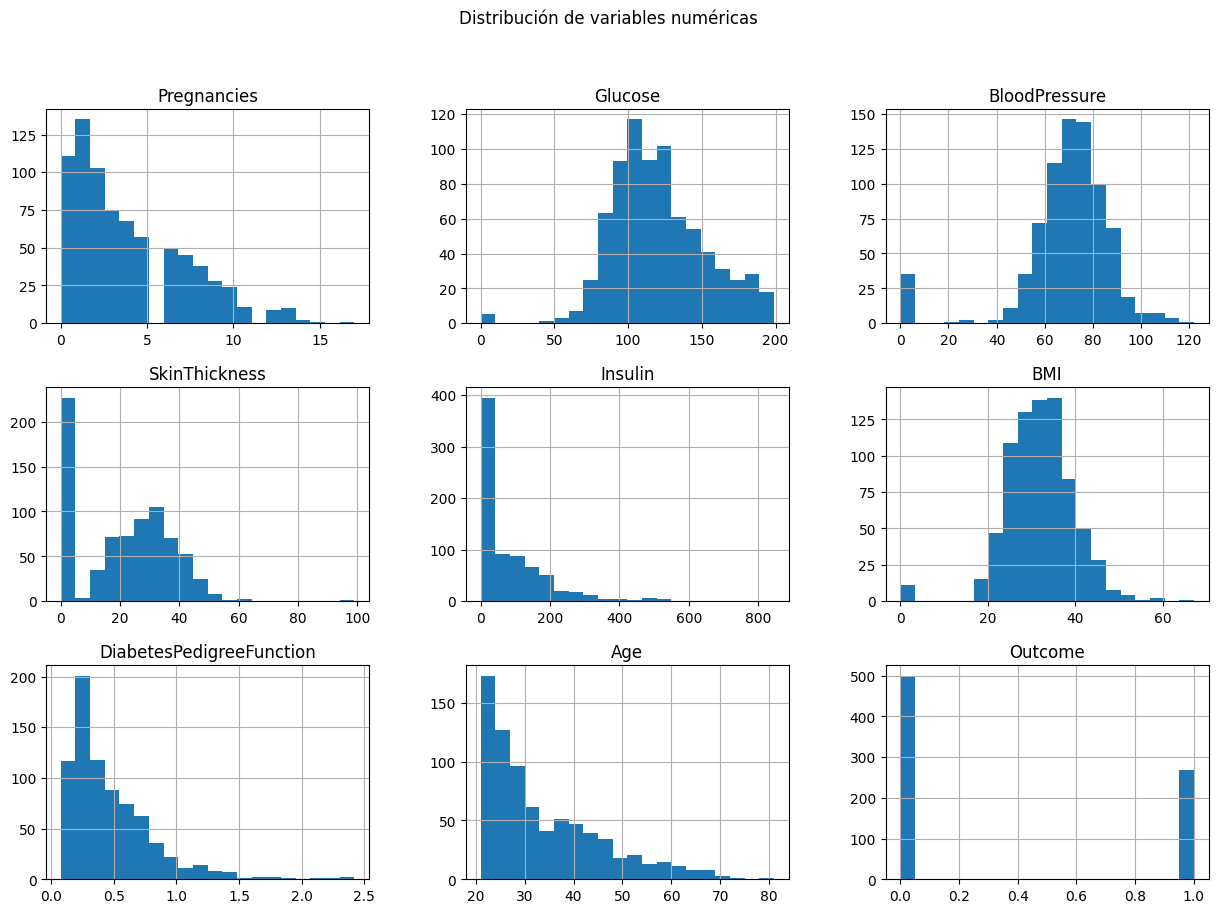

In [8]:
# Aislar variantes numericas y ver distribucion
num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas')
plt.show()

In [9]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
df['Glucose'].sort_values(ascending=True)

75       0
182      0
502      0
342      0
349      0
      ... 
408    197
579    197
228    197
561    198
661    199
Name: Glucose, Length: 768, dtype: int64

In [11]:
df['BMI'].sort_values(ascending=True)

81      0.0
371     0.0
426     0.0
145     0.0
522     0.0
       ... 
120    53.2
125    55.0
673    57.3
445    59.4
177    67.1
Name: BMI, Length: 768, dtype: float64

In [12]:
df['BloodPressure'].sort_values(ascending=True)

15       0
49       0
706      0
60       0
357      0
      ... 
549    110
43     110
177    110
691    114
106    122
Name: BloodPressure, Length: 768, dtype: int64

In [13]:
df = df[(df['Glucose'] != 0) & (df['BMI'] != 0)]


In [14]:
# Número de filas antes y después
print("Después:", len(df))


Después: 752


In [15]:

print("Antes:", len(df))
df = df[df['Pregnancies'] <= 10]
print("Outliers:", (df['Pregnancies'] > 10).sum())


Antes: 752
Outliers: 0


### Limpieza Pregnancies

Una vez que quite columnas de pregnancies, el resultado de Accurancy subio de 84 a 89

In [16]:

Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar outliers
df = df[(df['BloodPressure'] >= lower_bound) & (df['BloodPressure'] <= upper_bound)]


In [17]:
df.shape

(683, 9)

In [18]:
zeros_cols = ['SkinThickness', 'Insulin']

for col in zeros_cols:
    # Calcular medianas por grupo de Outcome
    median_0 = df[df['Outcome'] == 0][col].median()
    median_1 = df[df['Outcome'] == 1][col].median()
    
    # Reemplazar ceros según el grupo
    df.loc[(df['Outcome'] == 0) & (df[col] == 0), col] = median_0
    df.loc[(df['Outcome'] == 1) & (df[col] == 0), col] = median_1


In [19]:
df.shape

(683, 9)

### Limpieza
Eliminamos outliers con valor 0 de variables como Glucosa y BMI, eliminamos tambien outliers de bloodpresure que estan fuera de los interquantiles.

A la vez se decidio iterar los valores de 'SkinThickness' e 'Insulin', por la mediana de outcome positivo o negativo, ya que tenian muchos valores en 0.

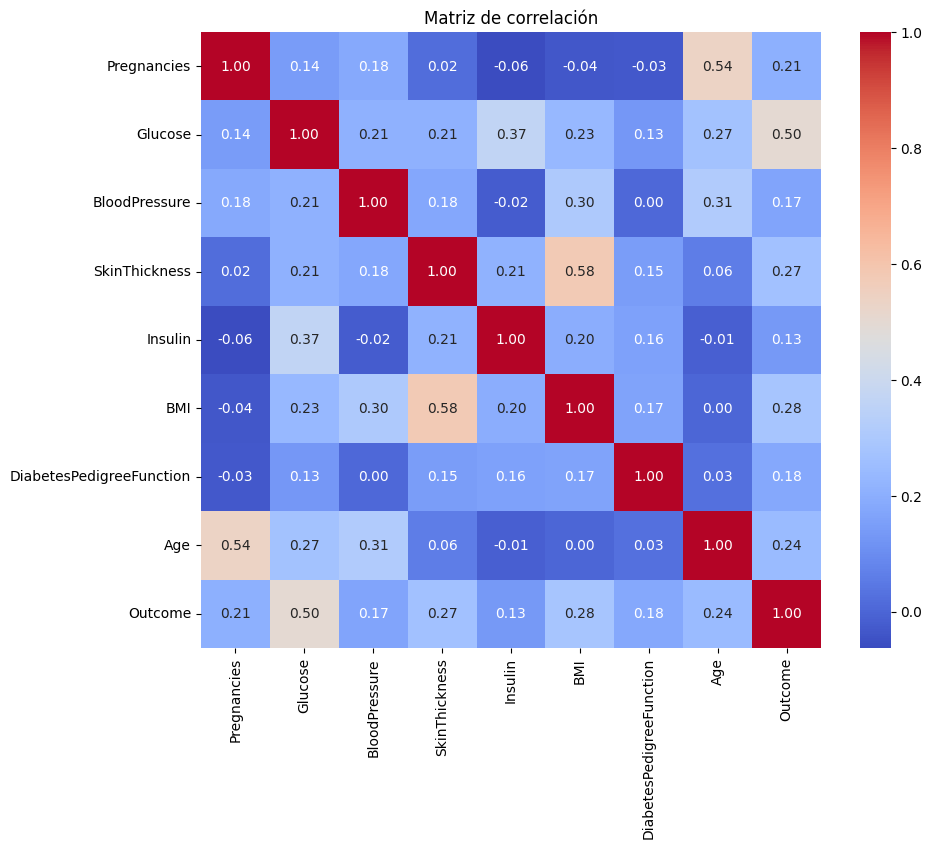

In [20]:
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

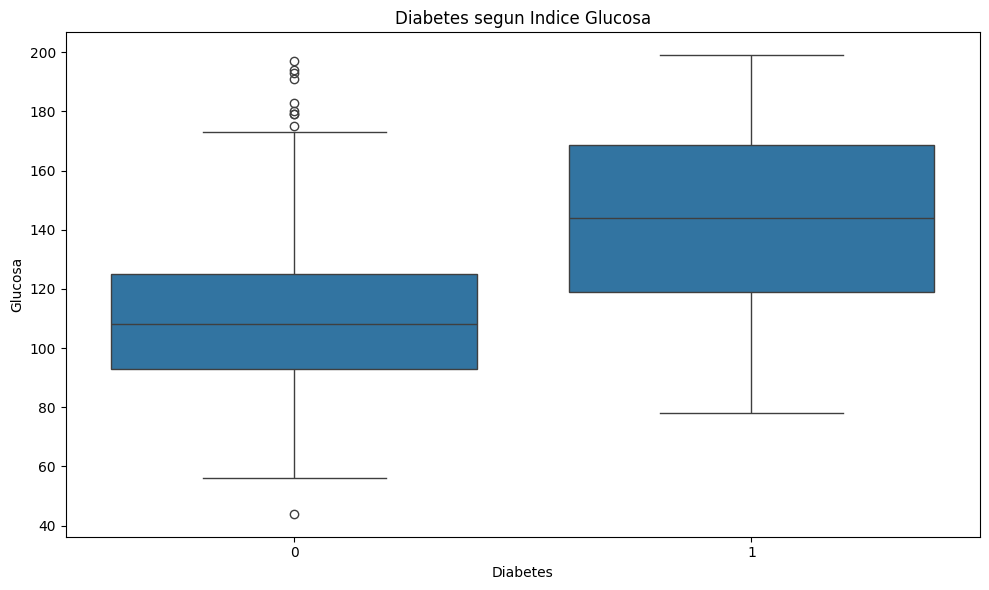

In [21]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Outcome', y='Glucose')
plt.title('Diabetes segun Indice Glucosa')
plt.xlabel("Diabetes")
plt.ylabel("Glucosa")
plt.tight_layout()
plt.show()

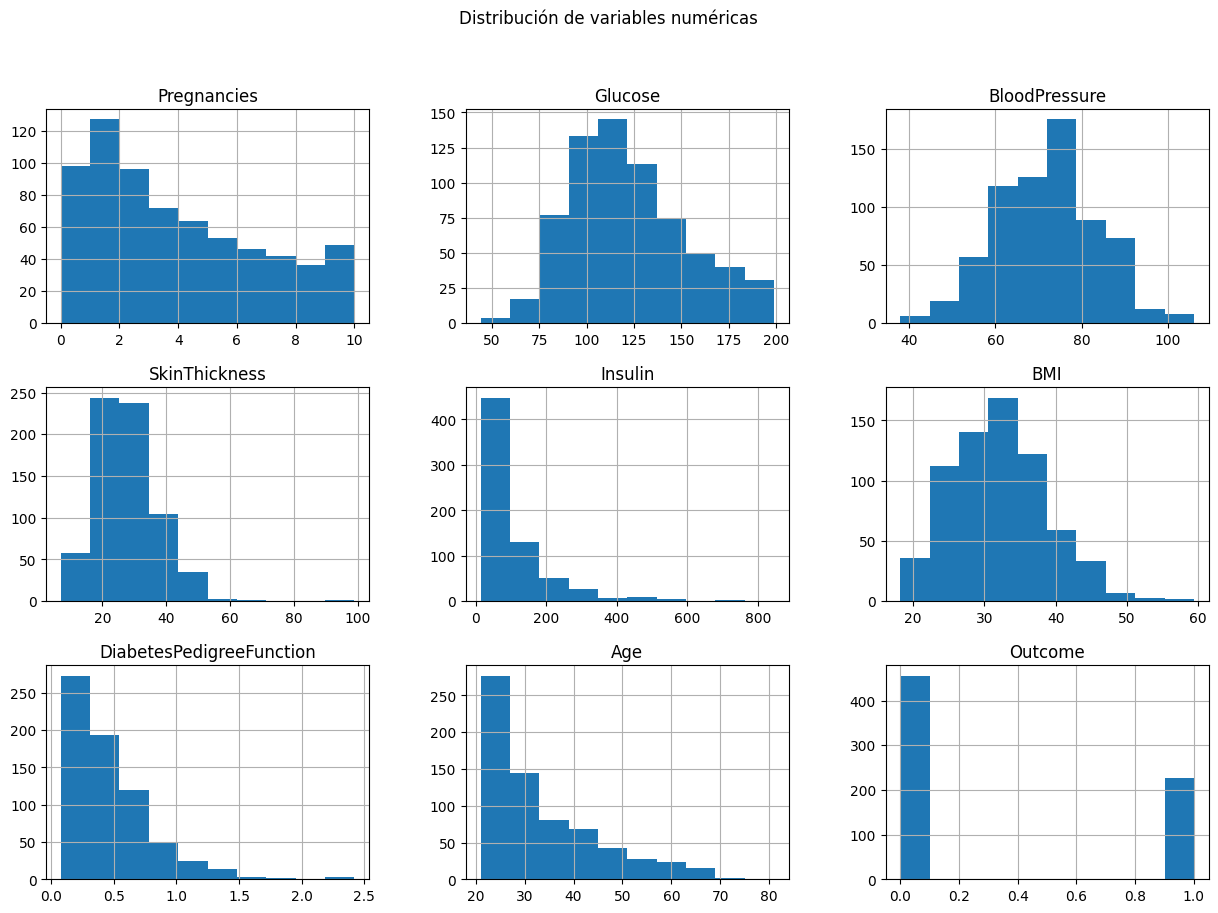

In [22]:
# Aislar variantes numericas y ver distribucion
num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(bins=10, figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas')
plt.show()

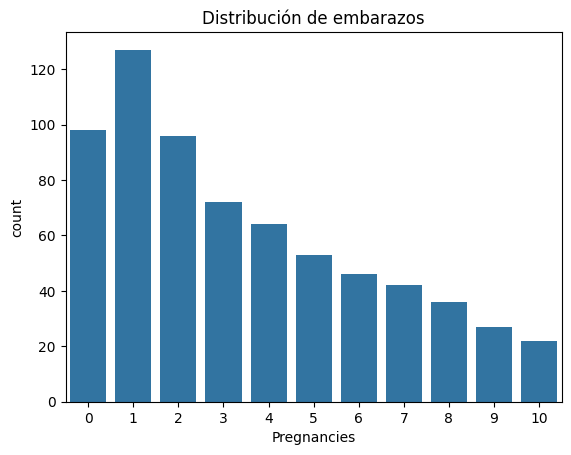

In [23]:

sns.countplot(x='Pregnancies', data=df)
plt.title('Distribución de embarazos')
plt.show()


In [24]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
492,4,99,68,38,49,32.8,0.145,33
289,5,108,72,43,75,36.1,0.263,33
661,1,199,76,43,36,42.9,1.394,22
22,7,196,90,27,36,39.8,0.451,41
397,0,131,66,40,36,34.3,0.196,22


In [25]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

X_train_df.to_csv('X_train.csv', index=False)
X_test_df.to_csv('X_test.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)


with open('dataset.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)


In [26]:
criterios = ["gini", "entropy", "log_loss"]
resultados = {}

for crit in criterios:
    # Modelo
    model = DecisionTreeClassifier(criterion=crit, random_state=42)
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Métricas
    resultados[crit] = {
        "Accuracy Test": accuracy_score(y_test, y_pred_test),
        "Accuracy Train": accuracy_score(y_train, y_pred_train),
        "F1 Test": f1_score(y_test, y_pred_test, average="micro"),
        "F1 Train": f1_score(y_train, y_pred_train, average="micro"),
        "Precision Test": precision_score(y_test, y_pred_test, average="micro"),
        "Precision Train": precision_score(y_train, y_pred_train, average="micro"),
        "Recall Test": recall_score(y_test, y_pred_test, average="micro"),
        "Recall Train": recall_score(y_train, y_pred_train, average="micro"),
    }



          Accuracy Test  Accuracy Train   F1 Test  F1 Train  Precision Test  \
gini           0.890511             1.0  0.890511       1.0        0.890511   
entropy        0.868613             1.0  0.868613       1.0        0.868613   
log_loss       0.868613             1.0  0.868613       1.0        0.868613   

          Precision Train  Recall Test  Recall Train  
gini                  1.0     0.890511           1.0  
entropy               1.0     0.868613           1.0  
log_loss              1.0     0.868613           1.0  


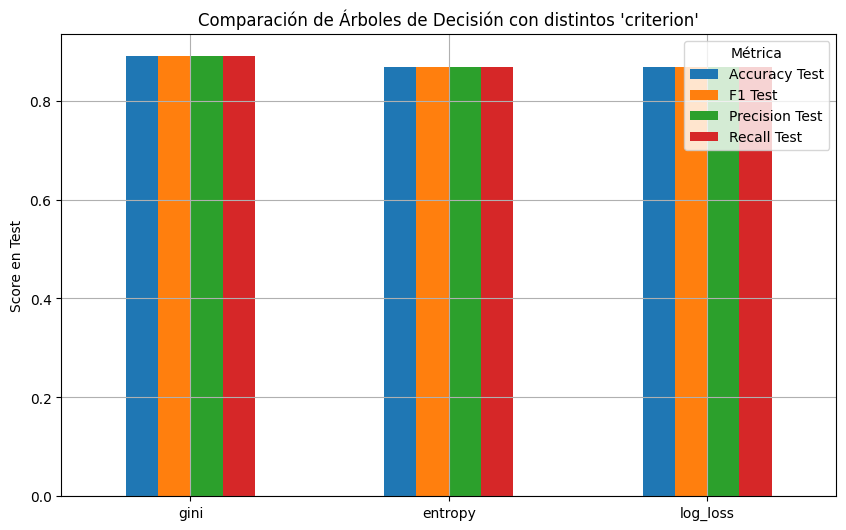

In [27]:

df_resultados = pd.DataFrame(resultados).T
print(df_resultados)

# Gráfico comparativo
df_resultados[["Accuracy Test","F1 Test","Precision Test","Recall Test"]].plot(kind="bar", figsize=(10,6), grid="true")
plt.title("Comparación de Árboles de Decisión con distintos 'criterion'")
plt.ylabel("Score en Test")
plt.xticks(rotation=0)
plt.legend(title="Métrica")
plt.show()

In [28]:
dt = DecisionTreeClassifier(criterion="gini", random_state=42)
param_grid = {
    "max_depth": [None, 3, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}

In [29]:
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring="f1_micro",   
    cv=5,                 
    n_jobs=-1,            
    verbose=2
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, 

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [None, 3, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'f1_micro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [30]:
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [31]:
dtoptimizado = DecisionTreeClassifier(criterion="gini", max_depth= 3, max_features= None, min_samples_leaf= 1, min_samples_split= 2, random_state=42)

In [32]:
dtoptimizado.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
y_pred_test = dtoptimizado.predict(X_test)
y_pred_train = dtoptimizado.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy Test:", accuracy_test)
print("Accuracy Train:", accuracy_train)


Accuracy Test: 0.8686131386861314
Accuracy Train: 0.8846153846153846


### Conclusion

Luego de probar las 3 diferentes funciones de calculo de pureza de nodos (gini, entropy, log_loss) concluimos que Gini es la que tiene un mejor resultados sobre el accurancy test.

A la hora de optimizar el modelo, el Accurancy test disminuye pero tiene mas poder de generalizacion cuando observamos el Accurancy train.

In [34]:
dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

URL prototipo https://agumarquez-proyecto-de-rbol-de-decisi-n.onrender.com/